<a href="https://colab.research.google.com/github/Abhiie/ML_Lab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
#creating labelEncoder
le = preprocessing.LabelEncoder()


# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")


print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
data = np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded])
#data = np.transpose(data)
column_name = ['Outlook','Temperature','Humidity','Wind']
df = pd.DataFrame(data =data,columns=column_name)
df

,Outlook,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [11]:
from sklearn.model_selection import train_test_split
x = data
y = Play_encoded

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
Accuracy: 0.7142857142857143
from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

Accuracy: 0.6666666666666666
confusion matrix : 



array([[1, 0],
       [1, 1]])

In [7]:
# Rainy , Hot , Normal and Windy
y_pred1 = clf.predict([[1,1,1,1]])
print(y_pred1)

[0]


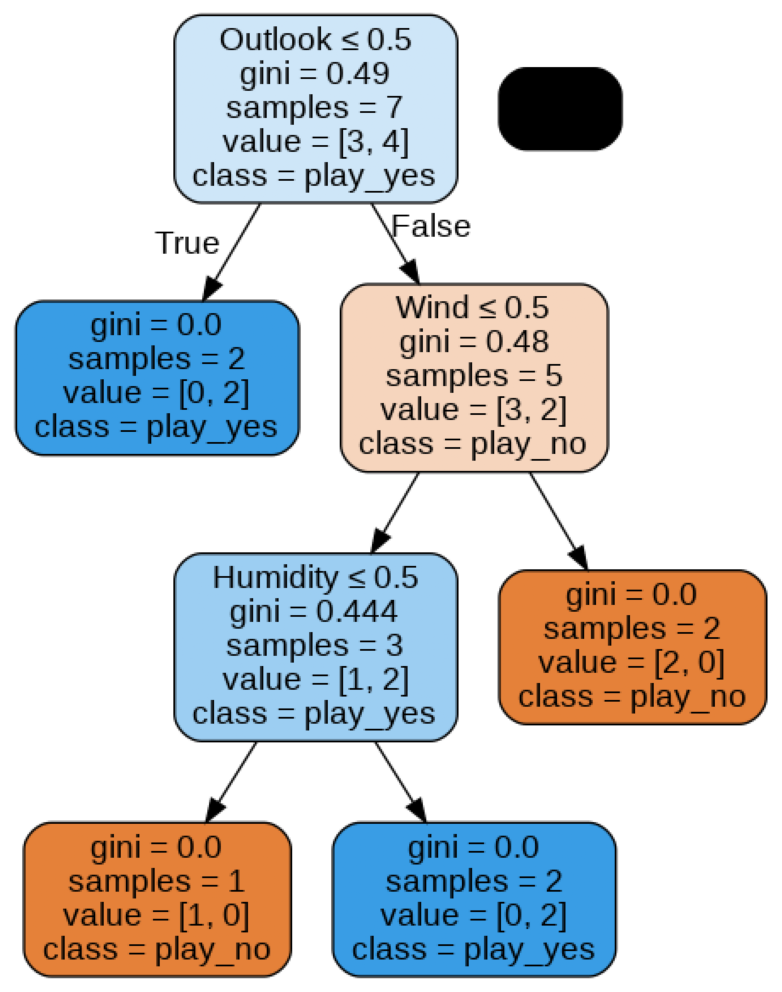

In [8]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = column_name,class_names=['play_no','play_yes'] )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('DecisionTree.png'))
plt.axis('off');
plt.show();

Q1 What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Nor- mal’, and Wind = ’False’?

In [9]:
print(clf.predict([[1,2,1,0]]))

[1]


In [10]:
print(clf.predict([[2,0,0,1]]))

[0]


In [13]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 107)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 1]


Apply algorithm on breast cancer wisconsin dataset - One Hot Encoding of features:

In [19]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
path = '/content/drive/MyDrive/Lab5/breast-cancer_csv.csv'
dataset = read_csv(path, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
1,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
2,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
3,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
4,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events


In [35]:
data = dataset.values

X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)

In [36]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
df.dropna(inplace=True)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
df.dropna(inplace=True)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 33.33
